#Parkinson Data Multiple Linear Regression

### Import Repository

In [2]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

### Import CSV dataset

In [3]:
df = pd.read_csv('combined_data(1).csv')
df

,timestamp,heart_rate,steps,stress_score,awake,deep,light,rem,nonrem_total,total,nonrem_percentage,sleep_efficiency,time_from_last_drug_taken,wo_duration,timestamp_hour,timestamp_dayofweek,timestamp_hour_sin,timestamp_hour_cos,wearing_off,participant
0,11/26/2021 0:00,-1.000000,0,-1.0,0,1,331,20,332,352,0.943182,1.000000,180.0,55,0,4,-3.330000e-12,1.000000,1,participant1
1,11/26/2021 0:15,-1.000000,0,-1.0,0,1,331,20,332,352,0.943182,1.000000,195.0,70,0,4,6.540313e-02,0.997859,1,participant1
2,11/26/2021 0:30,14.816667,13,-1.0,0,1,331,20,332,352,0.943182,1.000000,210.0,85,0,4,1.305262e-01,0.991445,1,participant1
3,11/26/2021 0:45,89.700000,0,72.2,0,1,331,20,332,352,0.943182,1.000000,225.0,100,0,4,1.950903e-01,0.980785,1,participant1
4,11/26/2021 1:00,91.966667,0,75.4,0,1,331,20,332,352,0.943182,1.000000,240.0,115,1,4,2.588190e-01,0.965926,1,participant1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,12/1/2021 22:45,116.116667,504,16.0,1,54,236,47,290,337,0.860534,0.997041,37.0,730,22,2,-3.214395e-01,0.946930,0,participant1
572,12/1/2021 23:00,103.616667,138,15.2,1,54,236,47,290,337,0.860534,0.997041,52.0,745,23,2,-2.588190e-01,0.965926,0,participant1
573,12/1/2021 23:15,93.400000,0,47.0,1,54,236,47,290,337,0.860534,0.997041,67.0,760,23,2,-1.950903e-01,0.980785,0,participant1
574,12/1/2021 23:30,86.160000,0,8.6,1,54,236,47,290,337,0.860534,0.997041,82.0,775,23,2,-1.305262e-01,0.991445,0,participant1


### Heart Rate VS Wearing Off Duration Scatter Plot

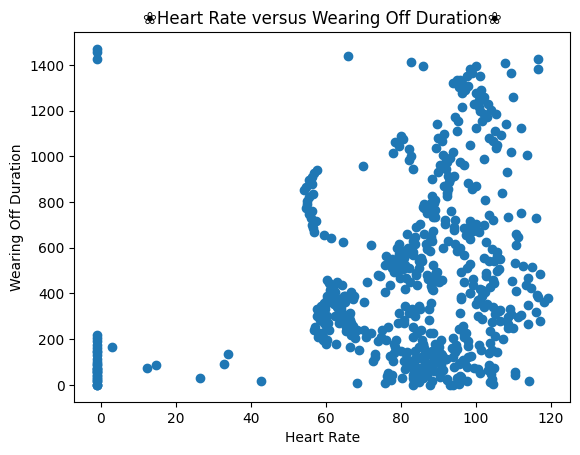

In [4]:
import matplotlib.pyplot as plt

# Create a scatter plot using heart rates and wearing off durations from a dataframe
plt.scatter(df['heart_rate'], df['wo_duration'])

# Set the title and axis labels for the plot
plt.title('❀Heart Rate versus Wearing Off Duration❀')
plt.xlabel('Heart Rate')
plt.ylabel('Wearing Off Duration')

# Save the plot as an image file
plt.savefig("HeartRate.jpg")

# Display the plot
plt.show()


### Stress Score VS Wearing Off Duration Scatter Plot

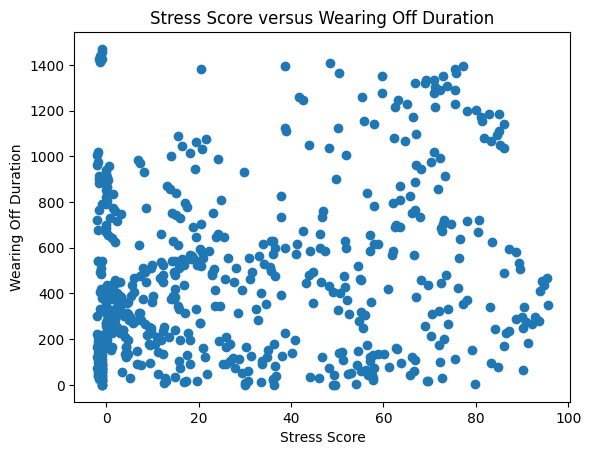

In [5]:
import matplotlib.pyplot as plt

# Create a scatter plot using stress scores and wearing off durations from a dataframe
plt.scatter(df['stress_score'], df['wo_duration'])

# Set the title and axis labels for the plot
plt.title('Stress Score versus Wearing Off Duration')
plt.xlabel('Stress Score')
plt.ylabel('Wearing Off Duration')

# Save the plot as an image file
plt.savefig("StressScore.jpg")

# Display the plot
plt.show()


### Time From Last Drug Taken VS Wearing Off Duration Scatter Plot

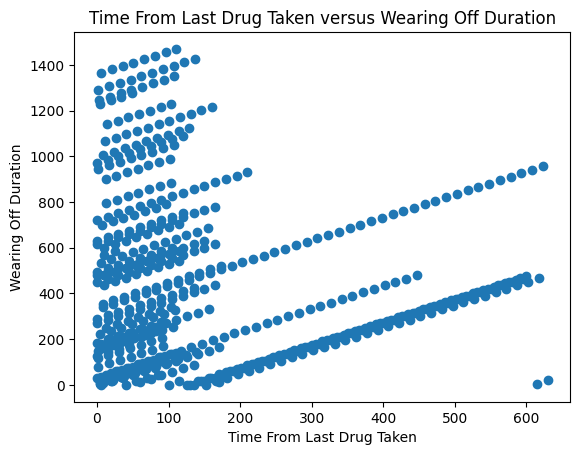

In [6]:
import matplotlib.pyplot as plt

# Create a scatter plot using time from the last drug taken and wearing off durations from a dataframe
plt.scatter(df['time_from_last_drug_taken'], df['wo_duration'])

# Set the title and axis labels for the plot
plt.title('Time From Last Drug Taken versus Wearing Off Duration')
plt.xlabel('Time From Last Drug Taken')
plt.ylabel('Wearing Off Duration')


# Save the plot as an image file
plt.savefig("DrugTime.jpg")

# Display the plot
plt.show()

### Set IV and DV

In [7]:
x = df[['heart_rate', 'stress_score', 'time_from_last_drug_taken']]
y = df['wo_duration']

### Calculate Regression with sklearn

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 216.76653388580047
Coefficients: 
 [2.45258723e+00 1.72733337e+00 9.40607544e-04]


### Calculate Regression with statsmodels

In [8]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            wo_duration   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     15.40
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.20e-09
Time:                        04:07:02   Log-Likelihood:                -4197.2
No. Observations:                 576   AIC:                             8402.
Df Residuals:                     572   BIC:                             8420.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<p style='background:green'>
So we can assume that <span style="font-weight:bold">Heart Rate</span> is the best variable to use to predict the "wearing-off" of anti-Parkinson Disease Medication
</p>

### Residual Plot Line Model

In [9]:
from sklearn.linear_model import LinearRegression
x = df['heart_rate']

In [10]:
model = LinearRegression()

In [11]:
model.fit(x.values.reshape(-1, 1), y)

LinearRegression()

In [12]:
model.intercept_

180.4489980390597

In [13]:
model.coef_

array([3.55295516])

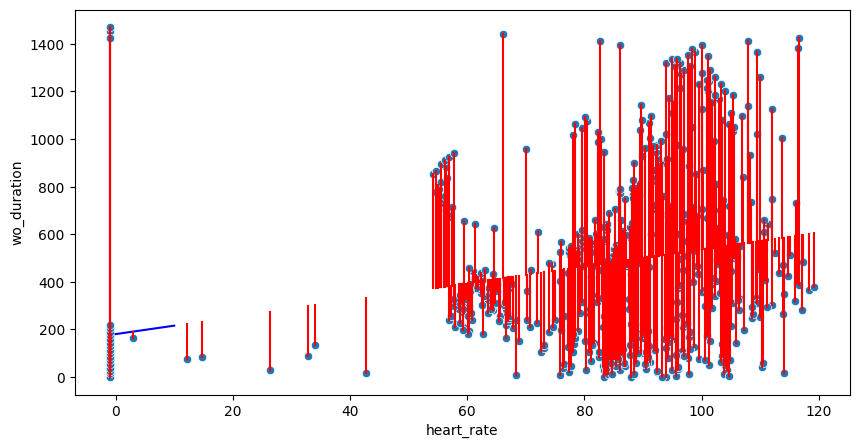

In [14]:
# Create a figure and axes for the plot
figure = plt.figure(figsize=(10, 5))
axes = plt.axes()

# Display the data points using a scatterplot
sns.scatterplot(x=x, y=y, ax=axes)

# Plot the regression line
sns.lineplot(x=[0, 10], y=[model.intercept_, (10 * model.coef_[0] + model.intercept_)], ax=axes, color='blue')

# Plot the residuals
for x_value, y_value in zip(x, y):
    predicted_y = x_value * model.coef_[0] + model.intercept_
    axes.plot([x_value, x_value], [y_value, predicted_y], color='red')

# Save the plot as an image file named 'HeartRateLine.jpg'
plt.savefig('HeartRateLine.jpg')